# Exercise Sheet 2: Inference, Sampling, and Regression

This repository contains **Exercise Sheet 2**, focusing on the key concepts of **Inference and Sampling** and **Linear and Ridge Regression**, with practical applications for machine learning and statistical modeling.

## Topics Covered

### 1. Inference and Sampling
Explore fundamental techniques for sampling from probability distributions and understanding inference algorithms.  
**Key Concepts:**
- Multivariate normal distributions.
- **Metropolis Hastings** algorithm: A Markov Chain Monte Carlo (MCMC) technique used for sampling from complex distributions.
- Marginal distributions and their importance in probabilistic models.

### 2. Regression
Learn the basics of regression techniques for predictive modeling and minimizing error in data fits.  
**Key Concepts:**
- **Linear Regression:** Fundamental regression technique for modeling relationships between variables.
- **Ridge Regression:** Extending linear regression with regularization to avoid overfitting.

## Purpose
This exercise sheet is designed to deepen understanding of inference and sampling techniques, while also introducing powerful regression models that form the backbone of predictive analytics in machine learning.


## Chapter 3: Inference and Sampling

### 3.1 Metropolis Hastings

*Topics: Multivariate normal, Metropolis Hastings and marginal distributions*

**Reading material: Murphy 24.3**

We will explore three different probability density functions, the first is 2-dim and bimodal, the other two are 10-dim and unimodal MVNs.



In [2]:
# provided

# The likelihood function is given

import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.contingency import margins

def pdf_bimodal(x):
    """Bimodal pdf"""
    sigma1 = 1.0
    sigma2 = 0.5
    pdf = 0.5/(2*np.pi*sigma1**2)*np.exp(-0.5*((x-1.5)**2).sum()/sigma1**2)  +  0.5/(2*np.pi*sigma2**2)*np.exp(-0.5*((x+1.0)**2).sum()/sigma2**2)
    return pdf

def pdf_10dim_c2(x):
    """10-dim MVN"""
    mu = np.zeros(10)
    corr = 0.2
    cov = np.eye(10, k = 0) + corr*np.eye(10, k = 1) + corr*np.eye(10, k = -1)
    pdf = scipy.stats.multivariate_normal.pdf(x, mu, cov)
    return pdf

def pdf_10dim_c5(x):
    """10-dim MVN with stronger correlations"""
    mu = np.zeros(10)
    corr = 0.5
    cov = np.eye(10, k = 0) + corr*np.eye(10, k = 1) + corr*np.eye(10, k = -1)
    pdf = scipy.stats.multivariate_normal.pdf(x, mu, cov)
    return pdf

1. Write your own Metropolish Hastings algorithm. (4 points)

- The proposal distribution is supposed to be a $D=2$ or $D=10$ dimensional isotropic Gaussian with variance $\sigma^2$.
- Given some pdf, the algorithm should produce and return a given number of chain points $N$, starting with some initial vector $\mathbf{x}_0$. The result should be returned as a $N\times D$ array.
- The algorithm should also evaluate and print the acceptance rate (fraction of accepted transitions over total number of steps).

Hints: Use `np.random.randn`, `np.random.rand`, `np.array` where appropriate. Write the algorithm such that it works for any dimensions of $\mathbf{x}_0$.

In [3]:
def MetropolisHastings(pdf, N, x_init, sigma):
    # Defining my dimensions
    dimensions = len(x_init)
    # Defining the sample of values
    samples = np.zeros((N, dimensions)) 
    # Starting value
    x_1 = x_init
    acc_rate = 0
    # Looping all over the number of iterations
    for j in range(N):
      #Defining my random values
        random_values = sigma * np.random.randn(dimensions)
        x_proposal = x_1 + random_values
        #acceptance rate
        acc = pdf(x_proposal) / pdf(x_1)
        #which value i select
        alpha = min(1, acc)
        #probability values
        u = np.random.rand()
        #if condition for accept or reject the value
        if u <= alpha:
            x_1 = x_proposal
            acc_rate += 1
        else:
            x_1 = x_1
            acc_rate += 0
        samples[j] = x_1
        #Returning a tuple
    return samples, acc_rate / (N + 1)

2. Explore the above bimodal distribution (first example).
- Show resulting chain for $N=10000$ and for five proposal widths in the range $\sigma \in [0.01, 100.]$.  
- Based on the acceptance rate and visual inspection of the result, argue what parameters work here best.
- What are the problems with too low or too high values of $\sigma$?
- Also discuss what happens when you start with initial values far away from the optimum. This initial phase is called "burn in phase".

Hints: use `plt.scatter`

Acceptance rate for sample_0 is 0.9923007699230078
Acceptance rate for sample_1 is 0.804019598040196
Acceptance rate for sample_2 is 0.47155284471552844
Acceptance rate for sample_3 is 0.18738126187381263
Acceptance rate for sample_4 is 0.0230976902309769


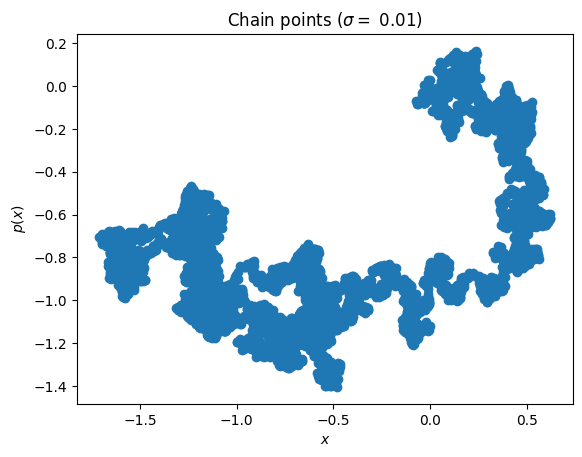

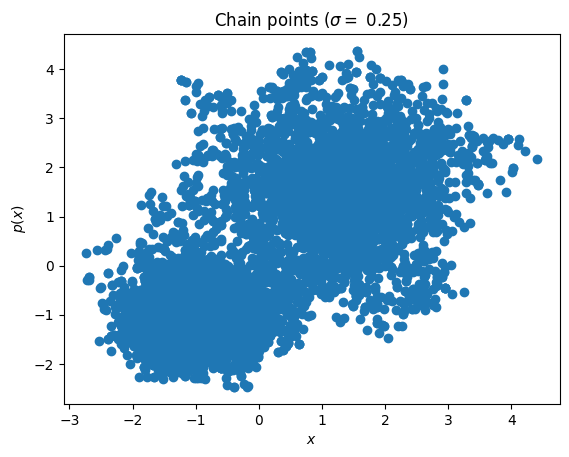

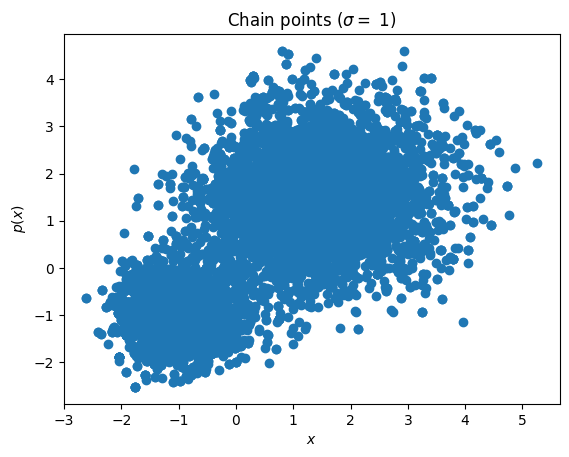

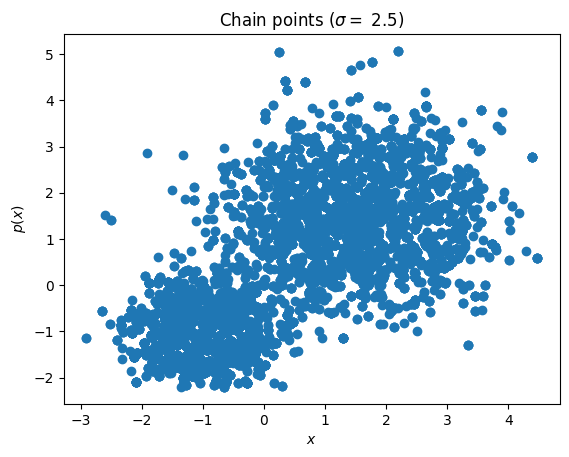

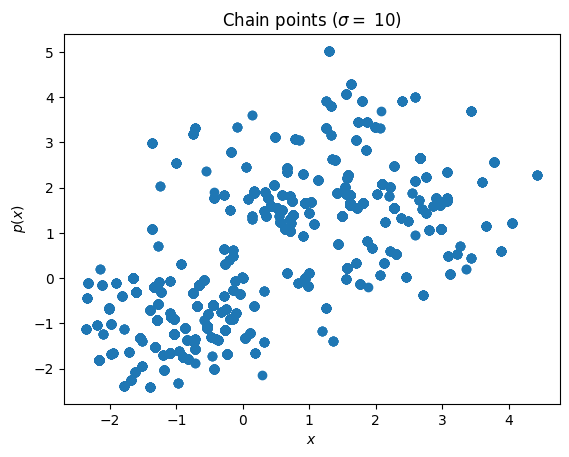

In [4]:
#Defining my steps
N=10000
#Defining my initial value
x_init=np.array([0,0])
#Choosing different sigma
sigma= [0.01, 0.25, 1, 2.5, 10]


sample_1, acc_rate_1 = MetropolisHastings(pdf_bimodal, N, x_init, sigma[0])
sample_2, acc_rate_2 = MetropolisHastings(pdf_bimodal, N, x_init, sigma[1])
sample_3, acc_rate_3 = MetropolisHastings(pdf_bimodal, N, x_init, sigma[2])
sample_4, acc_rate_4 = MetropolisHastings(pdf_bimodal, N, x_init, sigma[3])
sample_5, acc_rate_5 = MetropolisHastings(pdf_bimodal, N, x_init, sigma[4])

samples=[sample_1, sample_2,sample_3, sample_4, sample_5]
acc_rates= [acc_rate_1, acc_rate_2, acc_rate_3, acc_rate_4, acc_rate_5]


for j in range(len(acc_rates)):
  print( f"Acceptance rate for sample_{j} is {acc_rates[j]}" )



for j in range(len(samples)):
    fig1 = plt.subplots()
    plt.title(f'Chain points ($\sigma = $ {sigma[j]})')
    plt.xlabel('$x$')
    plt.ylabel('$p(x)$')
    plt.scatter(samples[j][:,0], samples[j][:,1])
    plt.show()

The right parameters for sigma are 0.25, 1, and 2.5. With sigma too small o too big, the algorithm will accept o reject too many points respectively. For sigma to small, we obtain a Markov Chain, and it is not what we want. On the other side, if sigma is too large, only few point are accepeted, sampling in the the wrong way the distribution.
If you start too far away from the optimum, the alogorithm will not sample correctly the distribution, because he will lose some steps during the process. 

3. Compare your results with the true distribution using 1-dim histograms (both in $x_1$ and $x_2$ direction)

- Discuss qualitatively whether the true distribution can be recovered for reasonable values of $\sigma$.
- Again, what happens if $\sigma$ is too large or too small?  Is what you see supporting your observations in the previous question?

Note: you have to write your own marginal distributions for `pdf_bimodal`, projected either on `x1` or on `x2` (do these two marginals differ in our case?).

Hints: use `plt.hist` with 100 bins and `density = True`

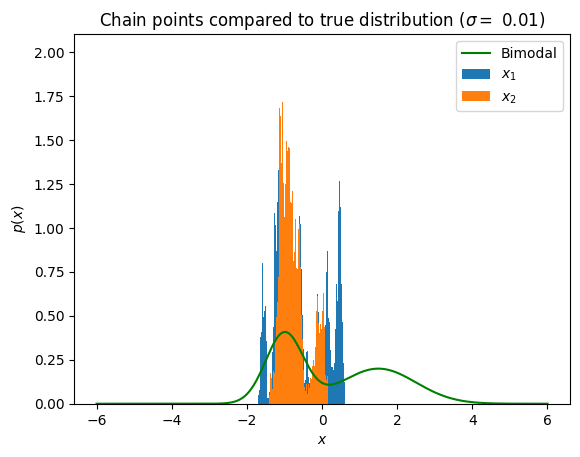

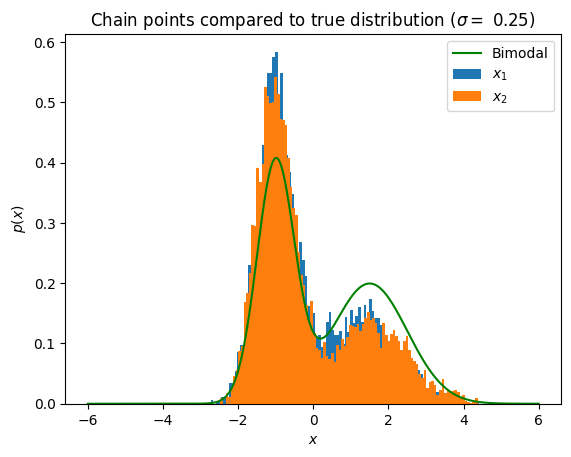

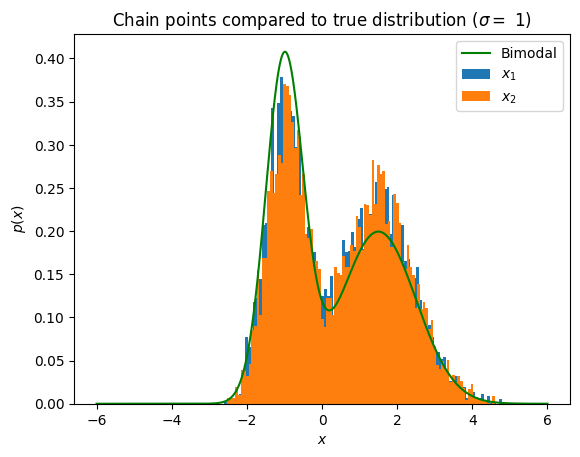

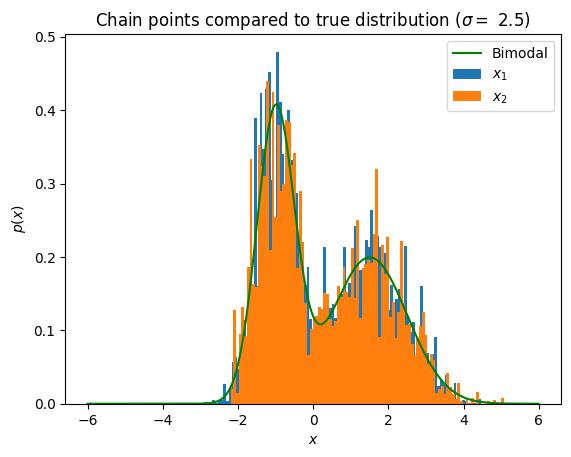

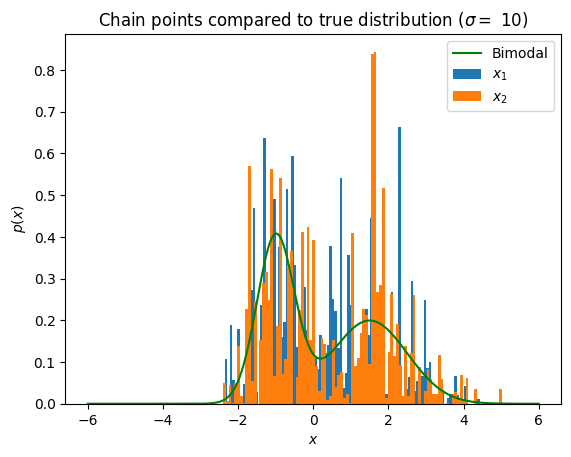

In [5]:
def pdf_bimodal_new(x):
    """Bimodal pdf"""
    sigma1 = 1.0
    sigma2 = 0.5
    pdf_x1 = 0.5/(np.sqrt(2*np.pi)*sigma1) * np.exp(-0.5*((x-1.5)/sigma1)**2) \
             + 0.5/(np.sqrt(2*np.pi)*sigma2) * np.exp(-0.5*((x+1.0)/sigma2)**2)
    return pdf_x1

# Generating x, y values
x = np.linspace(-6, 6, num=1000)

# Reshaping X, Y to match the expected shape for mvgauss function

distribution_pdf_bimodal = pdf_bimodal_new(x)

# Reshape distribution_pdf_bimodal to have the same shape as X and Y




for j in range(len(samples)):
    Fig1 = plt.subplots()
    plt.title(f'Chain points compared to true distribution ($\sigma = $ {sigma[j]})')
    plt.xlabel('$x$')
    plt.ylabel('$p(x)$')
    plt.plot(x ,distribution_pdf_bimodal, 'g', label = 'Bimodal')
    plt.hist(samples[j][:,0], density = True, bins = 100, label = '$x_1$')
    plt.hist(samples[j][:,1], density = True, bins = 100, label = '$x_2$')
    plt.legend()
    plt.show()

The distribution along x and y are the same because they are Gaussians, so integrating along x or y gives the same result. For sigma between 1 and 1.5, we can recover our initial distribution. For sigma too small o too large, we can not recover our distribution. In the first case, there are too many points concentrated in the same region. On the other hand, the shape of the distribution is visible, but a lot of points are outside our distribution.

4. Consider the 10-dim case. (2 point)
- Generate chains with 10000 steps, for initial values close to zero, and compare with the analytically expected result (a standard normal distribution).  
- Discuss why the acceptance rate is much lower than in the above 2-dim example, and why it becomes worse if the correlations become larger.

Acceptance rate for sample_0_d10 is 0.9946005399460054
Acceptance rate for sample_1_d10 is 0.692030796920308
Acceptance rate for sample_2_d10 is 0.12968703129687031
Acceptance rate for sample_3_d10 is 0.0034996500349965005
Acceptance rate for sample_4_d10 is 0.0


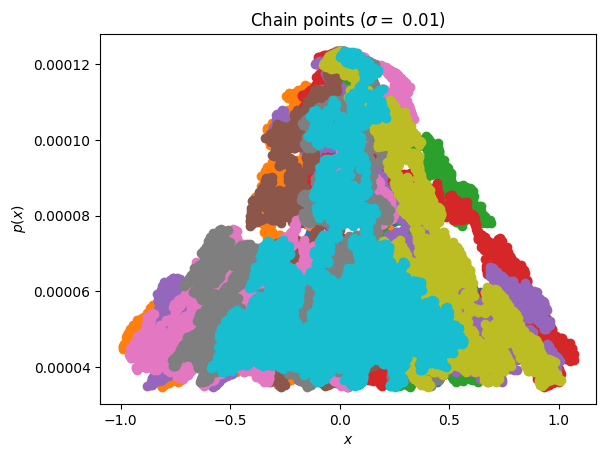

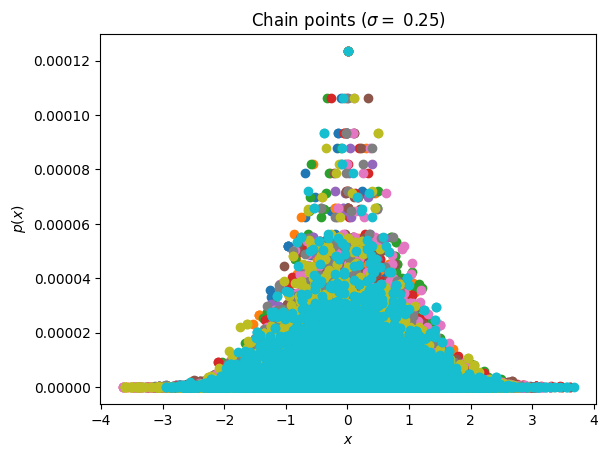

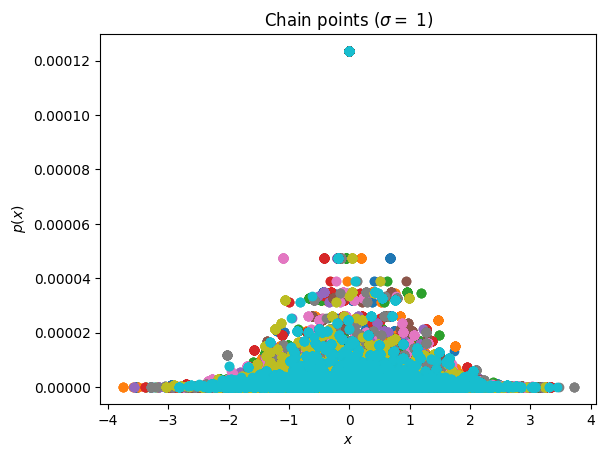

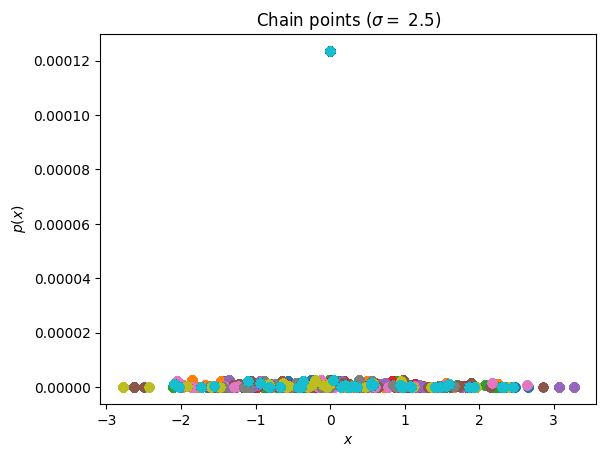

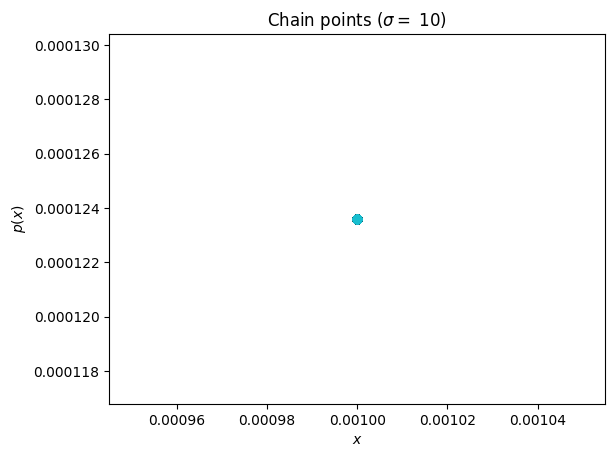

In [6]:
#Defining my steps
N=10000
#Defining my initial value
x_init_d10=np.zeros(10)+0.001
#Choosing different sigma
sigma= [0.01, 0.25, 1, 2.5, 10]


sample_1_d10, acc_rate_1_d10 = MetropolisHastings(pdf_10dim_c2, N, x_init_d10, sigma[0])
sample_2_d10, acc_rate_2_d10 = MetropolisHastings(pdf_10dim_c2, N, x_init_d10, sigma[1])
sample_3_d10, acc_rate_3_d10 = MetropolisHastings(pdf_10dim_c2, N, x_init_d10, sigma[2])
sample_4_d10, acc_rate_4_d10 = MetropolisHastings(pdf_10dim_c2, N, x_init_d10, sigma[3])
sample_5_d10, acc_rate_5_d10 = MetropolisHastings(pdf_10dim_c2, N, x_init_d10, sigma[4])

samples_d10=[sample_1_d10, sample_2_d10,sample_3_d10, sample_4_d10, sample_5_d10]
acc_rates_d10= [acc_rate_1_d10, acc_rate_2_d10, acc_rate_3_d10, acc_rate_4_d10, acc_rate_5_d10]

for j in range(len(acc_rates_d10)):
  print( f"Acceptance rate for sample_{j}_d10 is {acc_rates_d10[j]}" )

for j in range(len(samples_d10)):
    fig1 = plt.subplots()
    plt.title(f'Chain points ($\sigma = $ {sigma[j]})')
    plt.xlabel('$x$')
    plt.ylabel('$p(x)$')
    #plt.plot(x_values, pdf_bimodal_plotting(x_values), 'g', label = 'Bimodal')
    #plt.scatter(sample_1[:,0], pdf1, label = '$x_1$')
    for k in range(0,10):
        plt.scatter(samples_d10[j][:,k], pdf_10dim_c2(samples_d10[j]))
    plt.show()


Acceptance rate for sample_0_d10_c5 is 0.976002399760024
Acceptance rate for sample_1_d10_c5 is 0.4824517548245176
Acceptance rate for sample_2_d10_c5 is 0.0337966203379662
Acceptance rate for sample_3_d10_c5 is 0.0
Acceptance rate for sample_4_d10_c5 is 0.0


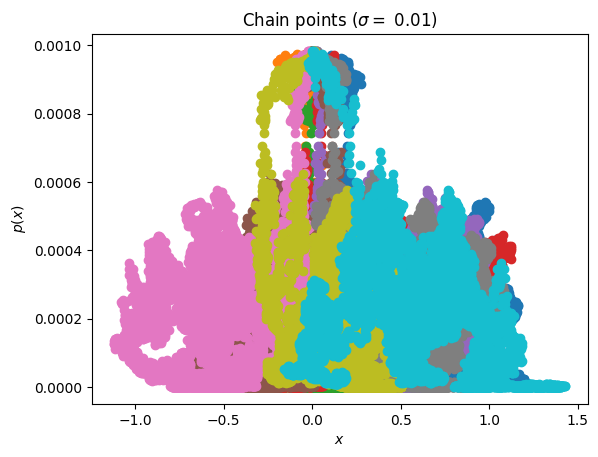

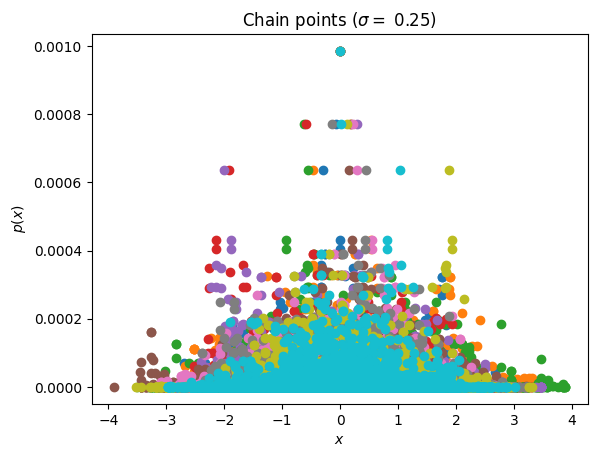

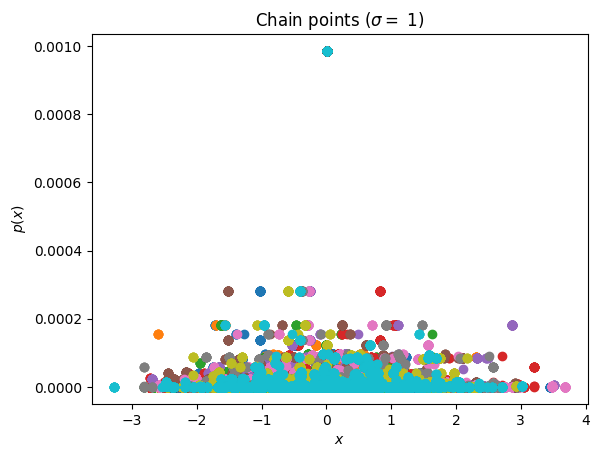

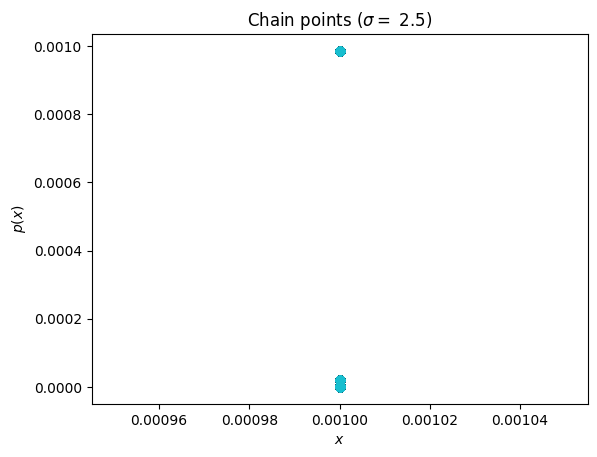

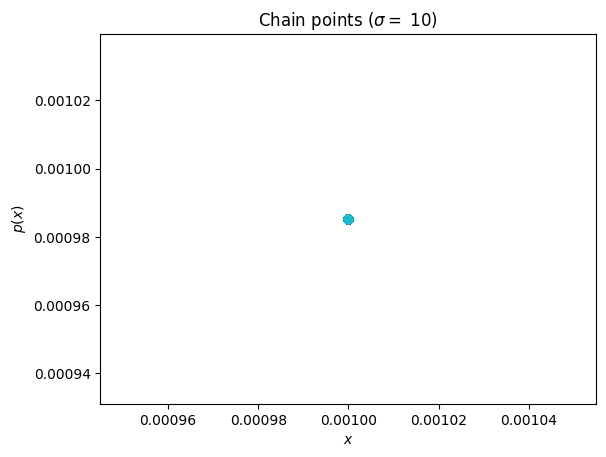

In [7]:
#Defining my steps
N=10000
#Defining my initial value
x_init_d10_c5=np.zeros(10)+0.001
#Choosing different sigma
sigma= [0.01, 0.25, 1, 2.5, 10]


sample_1_d10_c5, acc_rate_1_d10_c5 = MetropolisHastings(pdf_10dim_c5, N, x_init_d10_c5, sigma[0])
sample_2_d10_c5, acc_rate_2_d10_c5 = MetropolisHastings(pdf_10dim_c5, N, x_init_d10_c5, sigma[1])
sample_3_d10_c5, acc_rate_3_d10_c5 = MetropolisHastings(pdf_10dim_c5, N, x_init_d10_c5, sigma[2])
sample_4_d10_c5, acc_rate_4_d10_c5 = MetropolisHastings(pdf_10dim_c5, N, x_init_d10_c5, sigma[3])
sample_5_d10_c5, acc_rate_5_d10_c5 = MetropolisHastings(pdf_10dim_c5, N, x_init_d10_c5, sigma[4])

samples_d10_c5=[sample_1_d10_c5, sample_2_d10_c5,sample_3_d10_c5, sample_4_d10_c5, sample_5_d10_c5]
acc_rates_d10_c5= [acc_rate_1_d10_c5, acc_rate_2_d10_c5, acc_rate_3_d10_c5, acc_rate_4_d10_c5, acc_rate_5_d10_c5]

for j in range(len(acc_rates_d10_c5)):
  print( f"Acceptance rate for sample_{j}_d10_c5 is {acc_rates_d10_c5[j]}" )

for j in range(len(samples_d10_c5)):
    fig1 = plt.subplots()
    plt.title(f'Chain points ($\sigma = $ {sigma[j]})')
    plt.xlabel('$x$')
    plt.ylabel('$p(x)$')
    #plt.plot(x_values, pdf_bimodal_plotting(x_values), 'g', label = 'Bimodal')
    #plt.scatter(sample_1[:,0], pdf1, label = '$x_1$')
    for k in range(0,10):
        plt.scatter(samples_d10_c5[j][:,k], pdf_10dim_c5(samples_d10[j]))
    plt.show()

In 10 dimensions there are more degrees of freedom than 2 dimensions. This implies the algorithm has more possibility to generate a point in different dimensions, and it's likely unaccepted. Furthermore, the acceptance rate decreases when the correlation is large. Only for a small value of sigma, between 0.25 and 0.50 roughly, we can recover our distribution.

## Chapter 4: Regression


In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
#plt.style.use(['dark_background']) # if using dark background, easier to see the plots

### 4.1  Polynomial Regression

*Topics: Unregularized regression, chi square statistic*

**Reading material: Murphy 7.2, 7.3; Bishop 3.1**

Write a method `gen_sine(N)` that generates toy data like in the figure below. The method should have a parameter $N$, and should return $N$-dimensional vectors $\bx$ and $\bt$, where $\bx$ contains evenly spaced values from (0,1), and the elements $t_i$ of $\bt$ are distributed according to
$$t_i \sim \mathcal{N}(\mu_i, \sigma^2),$$
with the mean given by $\mu_i = \sin( 2 \pi x_i)$ and the standard deviation $\sigma=0.25$. Here $x_i$ is the $i$-th element of $\bf{x}$. You can make use of `np.random.normal()`.

Test your function by generating a plot similar to the one below:

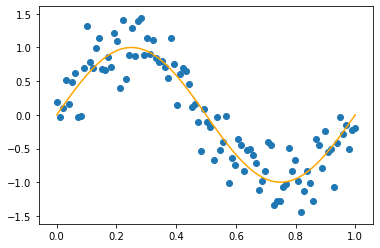

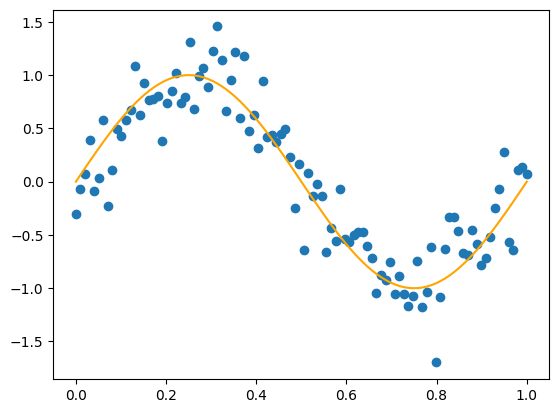

In [10]:
def gen_sine(n):
    x = np.linspace(0 , 1, n)
    mean = np.sin(2 * np.pi * x)
    sigma = 0.25
    t = np.random.normal(mean, sigma)
    return x, t

x_points, t_points = gen_sine(100)

plt.scatter(x_points, t_points)
plt.plot(x_points, np.sin(2 * np.pi * x_points), color = 'orange')
plt.show()

2.$$\\ $$ Write a method `fit_polynomial(x, t, M)` that finds the exact solution of the maximum-likelihood of an _unregularized_ $M$-th order polynomial for some dataset `x` as explained in the lectures. The error function to minimize w.r.t. $\bw$ is:
$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt)$,
where $\bPhi$ is the _feature matrix_ (or _design matrix_) as explained in the lecture (you can look at section 3.1.1 in Bishop or 7.3 in Murphy), and $\bt$ is the vector of target values. Your method should return a vector $\bw$ with the maximum-likelihood parameter estimates. As discussed in class, this has an analytical solution; this is the method you should use here.

In [11]:
def fit_polynomial(x,t,M):
    phi_matrix = np.vander(x,M+1, increasing= True)
    product = np.matmul(phi_matrix.T, phi_matrix)
    product_inverse = np.linalg.inv(product)
    new_product = np.matmul(product_inverse, phi_matrix.T)
    w = np.matmul(new_product, t)
    return w, phi_matrix

3. Sample a dataset with $N=50$, and fit four polynomials with $M \in (0,2,3,20)$. Plot the prediction function, along with the data and the original sine function. The resulting figures should look similar to the one provided below.
Make sure to save the $\bx$ and $\bt$ used in this exercise, as the "train" dataset.
Take a look at the optimal coefficients $\bw$ for these four cases and briefly comment their values as a function of M.


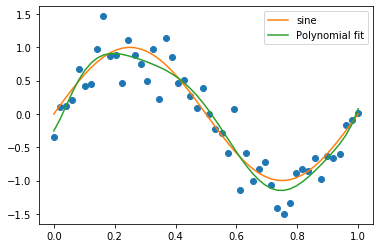

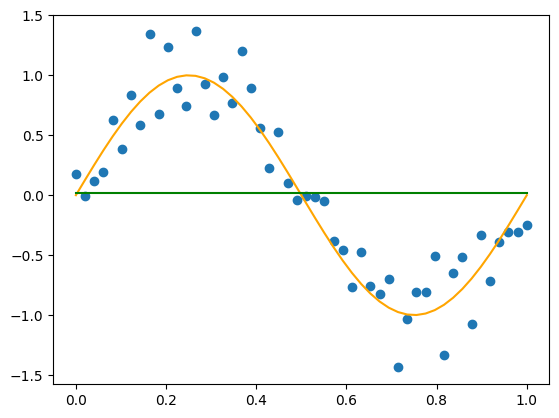

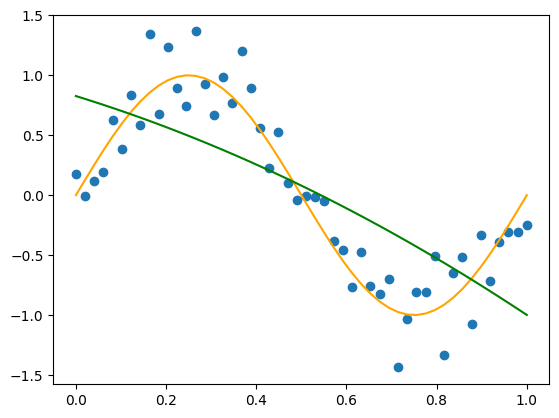

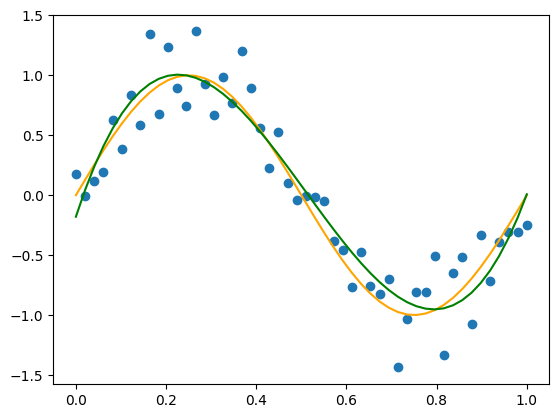

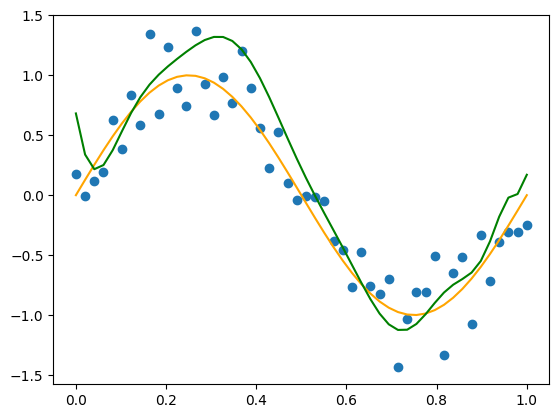

In [12]:
n = 50
M = np.array([0,2,3,20])
x_train, t_train = gen_sine(n)

for value in M:
    w, phi_matrix =fit_polynomial(x_train, t_train, value)
    plt.scatter(x_train, t_train)
    plt.plot(x_train, np.sin(2 * np.pi * x_train), color = 'orange')
    y_fit = np.dot(phi_matrix, w)
    plt.plot(x_train, y_fit, color = 'green')
    plt.show()
    

4.  When fitting real data, it's important to always leave some data out for testing to make sure that your model is not overfitting. However, in this case, we can just generate more data to use as test data. Using your training data from the last exercise, fit polynomials with $M \in \text{range}(0,10)$. For each model, calculate the reduced chi-square statistic
$$
\chi_\nu^2 = \frac{\chi^2}{\nu},
$$
$$
\chi^2 = \sum_i \frac{(O_i - C_i)^2}{\sigma_i^2}.
$$
Additionally, generate 50 new observations from your $\sin(2\pi x_i)$ function and, using this as test data, calculate the **test** reduced chi-square statistic for each of your values of $M$.
Plot the training and test values of $\chi_\nu^2$ versus $M$ and briefly comment what you see.

In [13]:
from scipy.stats import chisquare
New_M = [j for j in range(0,10)]
x_test, t_test = gen_sine(50)


for value in New_M:
    sigma = 0.25
    w, phi_matrix =fit_polynomial(x_train, t_train, value)
    y_fit = np.dot(phi_matrix, w)
    chi_square = np.sum(((t_train - y_fit) ** 2) / sigma**2)
    DOF = (len(t_train) - (value + 1))
    reduce_chi_square = chi_square/ DOF
    print(f"Reduced Chi-Square for M={value}: {reduce_chi_square}")



Reduced Chi-Square for M=0: 8.70892899491706
Reduced Chi-Square for M=1: 4.071730688020343
Reduced Chi-Square for M=2: 4.1133112808942345
Reduced Chi-Square for M=3: 1.0033529112059647
Reduced Chi-Square for M=4: 1.022400580595717
Reduced Chi-Square for M=5: 0.8938113121288812
Reduced Chi-Square for M=6: 0.9137678767245782
Reduced Chi-Square for M=7: 0.9321651159703199
Reduced Chi-Square for M=8: 0.941468064529356
Reduced Chi-Square for M=9: 0.9565847337823816


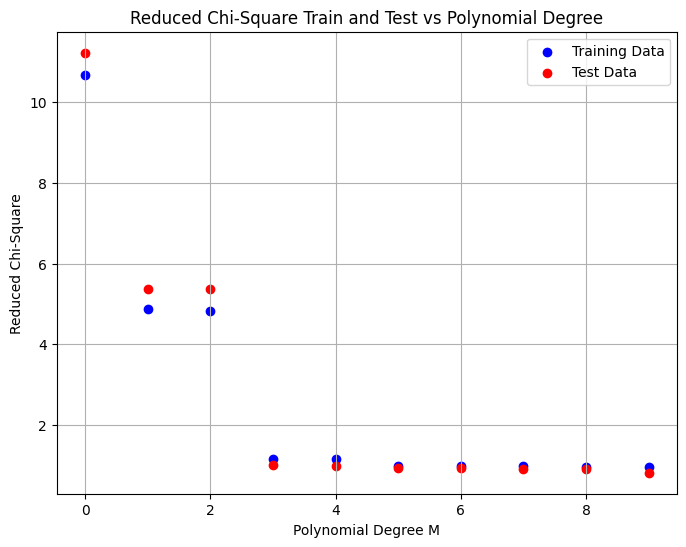

In [14]:
reduced_chi_square_train_list = []
reduced_chi_square_test_list = []

for j in range(0, len(New_M)):
    simga = 0.25
    w_train, phi_matrix_train = fit_polynomial(x_train, t_train, New_M[j])
    y_fit_train = np.dot(phi_matrix_train, w_train)
    chi_square_train = np.sum(((t_train - y_fit_train) ** 2) / sigma**2)
    DOF = (len(t_train) - (value + 1))
    reduce_chi_square_train = chi_square_train/DOF
    reduced_chi_square_train_list.append(reduce_chi_square_train)

    w_test, phi_matrix_test = fit_polynomial(x_test, t_test, New_M[j])
    y_fit_test = np.dot(phi_matrix_test, w_test)
    chi_square_test = np.sum(((t_test - y_fit_test) ** 2) / sigma**2)
    DOF = (len(t_train) - (value + 1))
    reduce_chi_square_test = chi_square_test/DOF
    reduced_chi_square_test_list.append(reduce_chi_square_test)

# Plot the reduced chi-square values vs M for both training and test data
plt.figure(figsize=(8, 6))
plt.scatter(New_M, reduced_chi_square_train_list, label='Training Data', marker='o', color='blue')
plt.scatter(New_M, reduced_chi_square_test_list, label='Test Data', marker='o', color='red')

# Add labels and title
plt.xlabel('Polynomial Degree M')
plt.ylabel('Reduced Chi-Square')
plt.title('Reduced Chi-Square Train and Test vs Polynomial Degree')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

### 4.2 Regularized Regression

*Topics: Regularized regression*

**Reading Material: Ref: Murphy 7.5**

1.  Write a method that finds the regularized $M$-th order polynomial for some dataset $\bx$. Your method should include the regularizer weight $\lambda$ as a parameter and return a vector $\bw$ with the maximum-likelihood parameter estimates.

In [15]:
def fit_polynomial_lambda(x,t,M,lambda_value):
    phi_matrix = np.vander(x,M+1, increasing= True)
    product = np.matmul(phi_matrix.T, phi_matrix)
    product_regularize = lambda_value * np.identity(M+1) + product
    product_inverse = np.linalg.inv(product_regularize)
    new_product = np.matmul(product_inverse, phi_matrix.T)
    w = np.matmul(new_product, t)
    return w, phi_matrix

2. Use your ``` gen_sine``` method to generate 10 datapoints, under the same conditions as before. Fit  polynomials of $M \in (0,2,3,9)$ for values $\lambda \in (0,10^{-5}, 10^{-3}, 10^{-2}, 100)$. Plot your results.

In [16]:
x_lambda, t_lambda = gen_sine(10)

M_lambda = [0, 2, 3, 9]

lambda_values = [0, 10**(-5), 10**(-3), 10**(-2), 100]

for value_lambda in M_lambda:
    sigma = 0.25 
    
    for lambdas in lambda_values:
        w_lambda, phi_matrix_lambda = fit_polynomial_lambda(x_lambda, t_lambda, value_lambda, lambdas)
        
        y_fit_lambda = np.dot(phi_matrix_lambda, w_lambda)

        chi_square_lambda = np.sum(((t_lambda - y_fit_lambda) ** 2) / sigma**2)
        
        DOF = len(t_lambda) - (value_lambda + 1)
        
        reduce_chi_square_lambda = chi_square_lambda / DOF
        
        print(f"Reduced Chi-Square for M={value_lambda}, lambda={lambdas}: {reduce_chi_square_lambda}")

Reduced Chi-Square for M=0, lambda=0: 6.985786986008742
Reduced Chi-Square for M=0, lambda=1e-05: 6.985786986008741
Reduced Chi-Square for M=0, lambda=0.001: 6.98578698601223
Reduced Chi-Square for M=0, lambda=0.01: 6.985786986357038
Reduced Chi-Square for M=0, lambda=100: 6.986075409542377
Reduced Chi-Square for M=2, lambda=0: 5.397345116053729
Reduced Chi-Square for M=2, lambda=1e-05: 5.397345116304087
Reduced Chi-Square for M=2, lambda=0.001: 5.397347572819468
Reduced Chi-Square for M=2, lambda=0.01: 5.397559900209053
Reduced Chi-Square for M=2, lambda=100: 8.84767356400637
Reduced Chi-Square for M=3, lambda=0: 0.669452132339632
Reduced Chi-Square for M=3, lambda=1e-05: 0.6696728628294871
Reduced Chi-Square for M=3, lambda=0.001: 1.5103323670848419
Reduced Chi-Square for M=3, lambda=0.01: 4.861912046188721
Reduced Chi-Square for M=3, lambda=100: 10.264223482776643
Reduced Chi-Square for M=9, lambda=0: inf
Reduced Chi-Square for M=9, lambda=1e-05: inf
Reduced Chi-Square for M=9, lamb

/var/folders/3p/f1ks__ss09vf2m4_z_cm1ry40000gp/T/ipykernel_29114/174119541.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  reduce_chi_square_lambda = chi_square_lambda / DOF


3. (2 point) $$\\ $$  Discuss your results. What is the effect of $\lambda$ on the model? What is happening to the coefficents $\bw$ as you increase $\lambda$? Which value of $\lambda$ is most appropriate for the model $M=9$? Why?


For small $\lambda$, the model gives correct result. $\lambda$ is a paramater close to 0 introduced by hand for regularize the algoritm. This means when $\lambda$ is high, the model gives wrong results. For this reason, for high values of lambda the coefficient $\bw$ are complitely out of range. The best value of lambda in M=9 is the closest to 0 in this case, which gives the most coherent result.